In [1]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

from scipy import interpolate
import gaiaxpy as gxp 


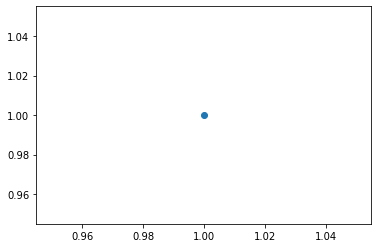

In [2]:
plt.scatter([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)

plt.show()

In [3]:
ddir = "/net/gaia2/data/users/gaia/andrae_xgboost/dr3/"
xgdf = vaex.open(ddir+'table1.hdf5')


gdir = "/net/gaia2/data/users/gaia/gaia-dr3/"

dataFrame = vaex.open( gdir+ "gaia-dr3.hdf5")
dataFrame.join(
    vaex.open(
       gdir+ "gaia-dr3.d/xp_spec.hdf5"
    ),
    inplace=True,
)


dirr = "/Users/users/spirov/Blk/Archive/ClusterProject/GC_membership/data/"
name = "NGC_6752"
sam = vaex.open(dirr+name+".hdf5")


sampl = sam[sam["memberprob"]>0.85]
#members = dataFrame['source_id'].isin(sampl['source_id'].values)

mdir = "/Users/users/spirov/Blk/Archive/ClusterProject/"

standardsApogee = vaex.from_csv(mdir+"J_MNRAS_492_1641_Gaia_EDR3 (1)")


clusterFrame = dataFrame.join(sampl, on="source_id",lprefix="d_",how="inner")


In [4]:
tester = "/Users/users/spirov/PopProject/"
df = vaex.open(tester+"poege5_10kpc_ebvle0.2_Gle16_wJPLUSandJKC.hdf5")

In [5]:
clusterFrame = df.join(clusterFrame,on="source_id",lprefix="l_",how="inner")

# FIltering

In [6]:
bprp = clusterFrame.bp_rp.values
mG = clusterFrame.l_phot_g_mean_mag.values


centr = np.array([287.717102, -59.984554])
R = np.sqrt( (clusterFrame.ra-centr[0])**2 + (clusterFrame.dec-centr[1])**2 )
clusterFrame["offcenter"] = R
Rs = clusterFrame.offcenter.values



a = 0.5
b = 18
cut = np.union1d(np.where(bprp>a), np.where(mG>b))

dCut = np.where(np.log(Rs)>-2)[0]
fCut = np.intersect1d(cut,dCut)

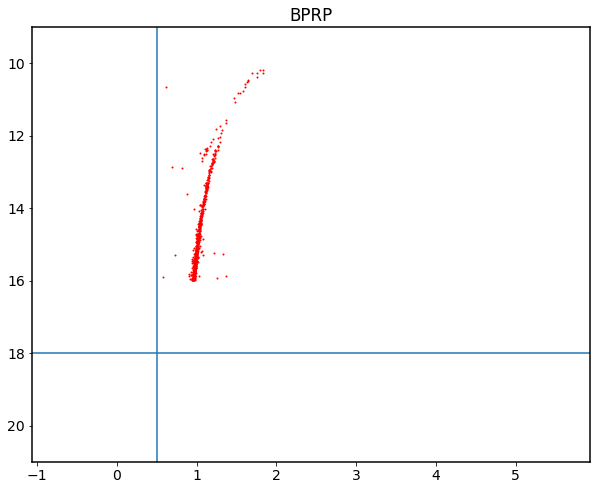

In [7]:
plt.figure(figsize=(10,8))
plt.axhline(b)
xWidth = 7
plt.axvline(a)
plt.plot(bprp[cut], mG[cut], 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")
plt.ylim(21, 9)
plt.axhline()
plt.show()

JKC


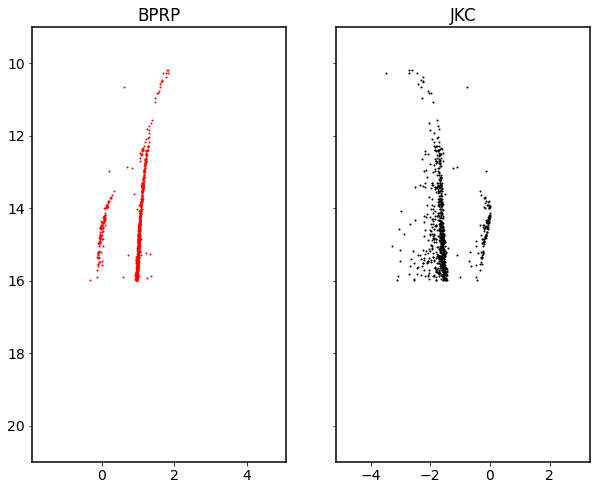

In [8]:
print("JKC")

mG = clusterFrame.phot_g_mean_mag.values

mag = clusterFrame.Jkc_mag_U-clusterFrame.Jkc_mag_B

MPivot = clusterFrame.Jkc_mag_B-clusterFrame.Jkc_mag_I
myCol = mag-MPivot

bprp = clusterFrame.bp_rp.values
clusterFrame["JKC"] = myCol

color =  clusterFrame.JKC.values
xWidth = 7

plt.figure(figsize=(10,8))
ax1 = plt.subplot(121)
plt.plot(bprp, mG, 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")

ax2 = plt.subplot(122, sharey=ax1)
aa = plt.plot(color, mG, 'ko', ms=1)
plt.tick_params('y', labelleft=False)
plt.title("JKC")
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth)

plt.ylim(21, 9)
#plt.suptitle("NGC 6656")

plt.show()


name = "JKB, C_UBI"

# Jpas Custom

In [9]:
corrFlux = 10**(-51.1/2.5)
AfAv = 1.54
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_u_corr = fi*clusterFrame.Jpas_flux_u/corrFlux


AfAv = 1.44
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_400_corr = fi*clusterFrame.Jpas_flux_J0400/corrFlux

AfAv = 1.4
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*clusterFrame.Jpas_flux_J0410/corrFlux


JpasHigh = Jpas_flux_400_corr + Jpas_flux_u_corr+Jpas_flux_410_corr


In [10]:
AfAv = 1.36
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_420_corr = fi*clusterFrame.Jpas_flux_J0420/corrFlux

AfAv = 1.4
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*clusterFrame.Jpas_flux_J0410/corrFlux

JpasMid = Jpas_flux_410_corr+Jpas_flux_420_corr

AfAv = 1.33
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_430_corr = fi*clusterFrame.Jpas_flux_J0430/corrFlux


In [11]:
AfAv = 0.865
fi = 10**(clusterFrame.ebv*AfAv*3.1/2.5)
Jpas_flux_SDDS_corr = fi*clusterFrame.Jpas_flux_iSDSS/corrFlux

In [12]:
def mag(f):
    return -2.5*np.log10(f)

In [13]:
clusterFrame["JpasHigh"] = mag(JpasHigh)
clusterFrame["JpasMid"] = mag(JpasMid)
clusterFrame["Jpas420"] = mag(Jpas_flux_420_corr)
clusterFrame["Jpas430"] = mag(Jpas_flux_430_corr)
clusterFrame["JpasSDSS"] = mag(Jpas_flux_SDDS_corr)


Custom Filter


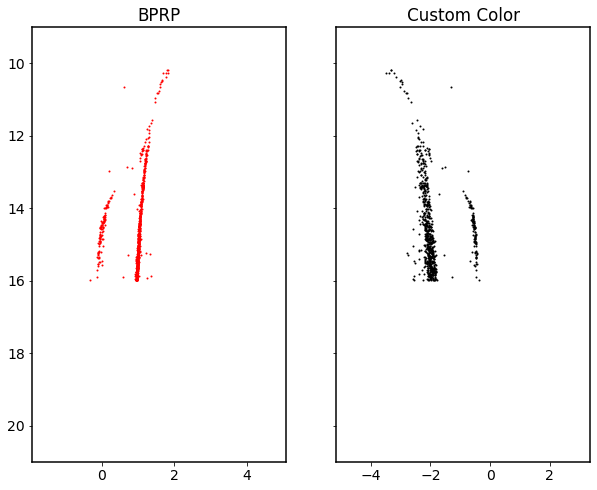

In [14]:
print("Custom Filter")

name = "Jpas (H-430)-(430-JpasSDSS)"

mG = clusterFrame.phot_g_mean_mag.values

mag = clusterFrame.JpasHigh-clusterFrame.Jpas430

MPivot = clusterFrame.Jpas430-clusterFrame.JpasSDSS
myCol = mag-MPivot

bprp = clusterFrame.bp_rp.values

clusterFrame["CustomCol"] = myCol

color =  clusterFrame.CustomCol.values
xWidth = 7

plt.figure(figsize=(10,8))
ax1 = plt.subplot(121)
plt.plot(bprp, mG, 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")

ax2 = plt.subplot(122, sharey=ax1)
aa = plt.plot(color, mG, 'ko', ms=1)
plt.tick_params('y', labelleft=False)
plt.title("Custom Color")
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth)

plt.ylim(21, 9)
#plt.suptitle("NGC 6656")

plt.show()





# STANDARD PROCEDURE

skip


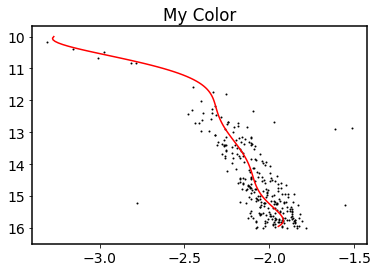

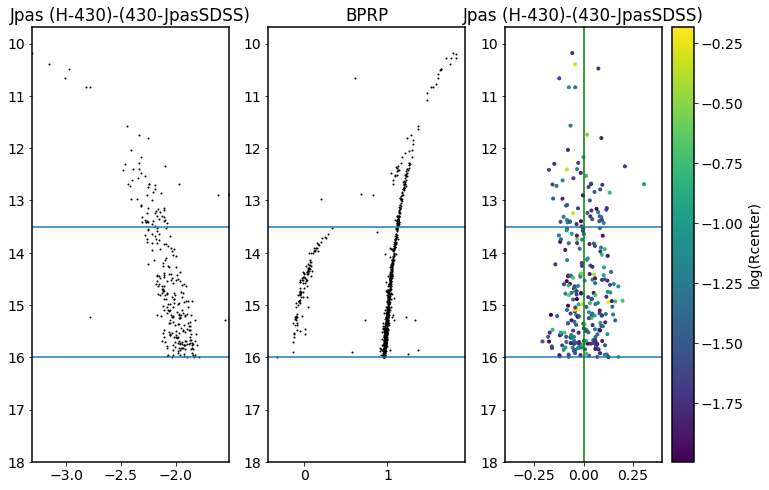

In [15]:
H = fCut
col = color[H]

point = 16
p2 =13.5


bot = 10#11.7
obprp=np.copy(bprp)
nG = clusterFrame.phot_g_mean_mag.values[H]

bins = np.linspace(bot, point+0.1, 15)

bc =[]
mu=[]
sig=[]
isig=[]

for xmin, xmax in zip(bins[:-1], bins[1:]):
    cen = (xmax + xmin)/2
    j = (nG < xmax)*(nG >= xmin)

    if len(np.where(j==True)[0]) ==0:
        print("skip")
        continue

    cs = col[j]
    cs = cs[~np.isnan(cs)]
    mc = np.median(cs)
    std = np.std(cs)
    bc.append(cen)
    mu.append(mc)
    sig.append(std)
    
p = np.polyfit(bc,mu, 7)
f = lambda x: np.polyval(p,x)
#    f = interpolate.interp1d(bc, mu, kind='cubic', bounds_error=False, fill_value=(mu[0], mu[-1]))


#plt.figure(figsize=(6,8))
plt.plot(col, nG, 'ko', ms=1)

X = np.arange(bot, point, 0.05)
plt.plot(f(X),X,'r-')


#plt.xlim(-9, -5.5)
plt.ylim(max(nG)+0.5, min(nG)-0.5)
plt.title("My Color")
plt.show()

#'''

##################################################################################



clensedCol = col[~np.isnan(col)]
cleansedMG = nG[~np.isnan(col)]

zone = np.logical_and(cleansedMG<point, cleansedMG>p2)

MG = cleansedMG
NC = clensedCol - f(MG)
cleansedR = Rs[H][~np.isnan(col)]



plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
plt.plot(clensedCol, cleansedMG, 'ko', ms=1)

#  plt.scatter(mu,bc,c='r',marker="+")


plt.ylim(18, min(mG)-0.5)
plt.xlim(min(clensedCol),max(clensedCol))
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')

ax2 = plt.subplot(132,sharey=ax1)
plt.plot(bprp, mG, 'ko', ms=1)

plt.ylim(18, min(mG)-0.5)
plt.title("BPRP")
plt.axhline(point)
plt.axhline(p2)

#  plt.scatter(mu,bc,c='r',marker="+")


ax2 = plt.subplot(133,sharey=ax1)

plt.scatter(NC, MG, marker=".",c=np.log(cleansedR))

plt.ylim(18, min(nG)-0.5)
plt.xlim(-0.4,.4)
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')
cb = plt.colorbar()
cb.set_label("log(Rcenter)")


#    plt.scatter(mu,bc,c='r',marker="+")

N=NC[zone]

plt.show()

    

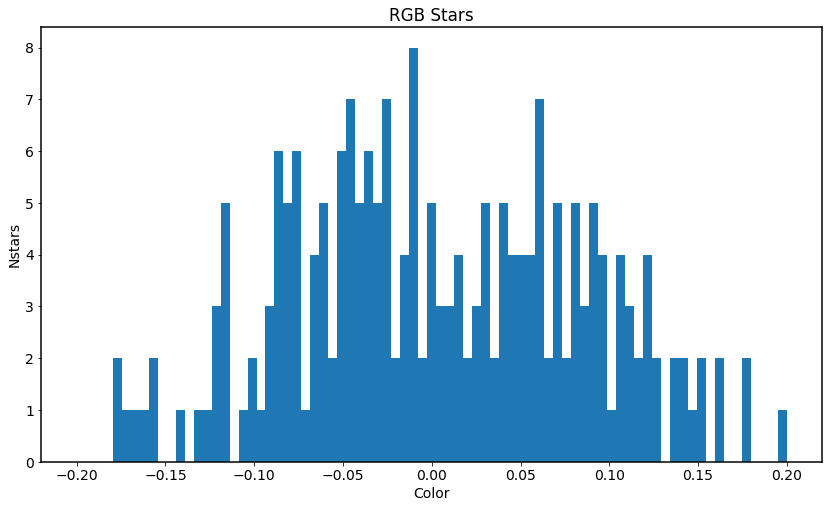

In [16]:
r= 0.2
bs = np.linspace(-r,r,80)

plt.figure(figsize=(14,8))

plt.hist(N,bs)

plt.title("RGB Stars")



plt.xlabel("Color")
plt.ylabel("Nstars")
plt.show()

In [17]:
Mgs = standardsApogee["[Mg/Fe]"].values #standardsApogee
Als = standardsApogee["[Al/Fe]"].values

S = np.logical_and(np.isnan(Mgs), np.isnan(Als))

Mgs = Mgs[~S]
Als = Als[~S]

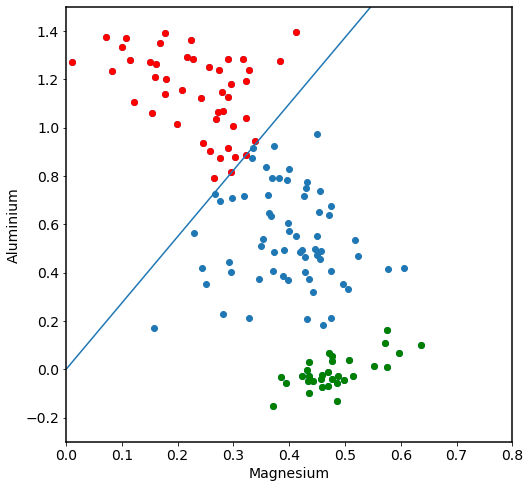

In [18]:
def selfunc(x,angl, minx=0,miny=0):
    m=np.tan(np.deg2rad(angl))
    return (x-minx)*m -miny
    
plt.figure(figsize=(8,8))
plt.scatter(Mgs,Als)
plt.xlabel("Magnesium")
plt.ylabel("Aluminium")


angle = 70



p1 = np.where(selfunc(Mgs,angle)<Als)
plt.scatter(Mgs[p1],Als[p1],c='r')

p2 = np.where(selfunc(Mgs,90-angle)>Als)
plt.scatter(Mgs[p2],Als[p2],c='g')




Xs = np.linspace(0,0.8,60)
Ys = selfunc(Xs,angle)

plt.plot(Xs,Ys)

plt.xlim(0,0.8)
plt.ylim(-0.3,1.5)

plt.show()

In [19]:
Gai1 = standardsApogee["source_id"].values[p1]
Gai2 = standardsApogee["source_id"].values[p2]

P1 = clusterFrame['source_id'].isin(Gai1).values
P2 = clusterFrame['source_id'].isin(Gai2).values


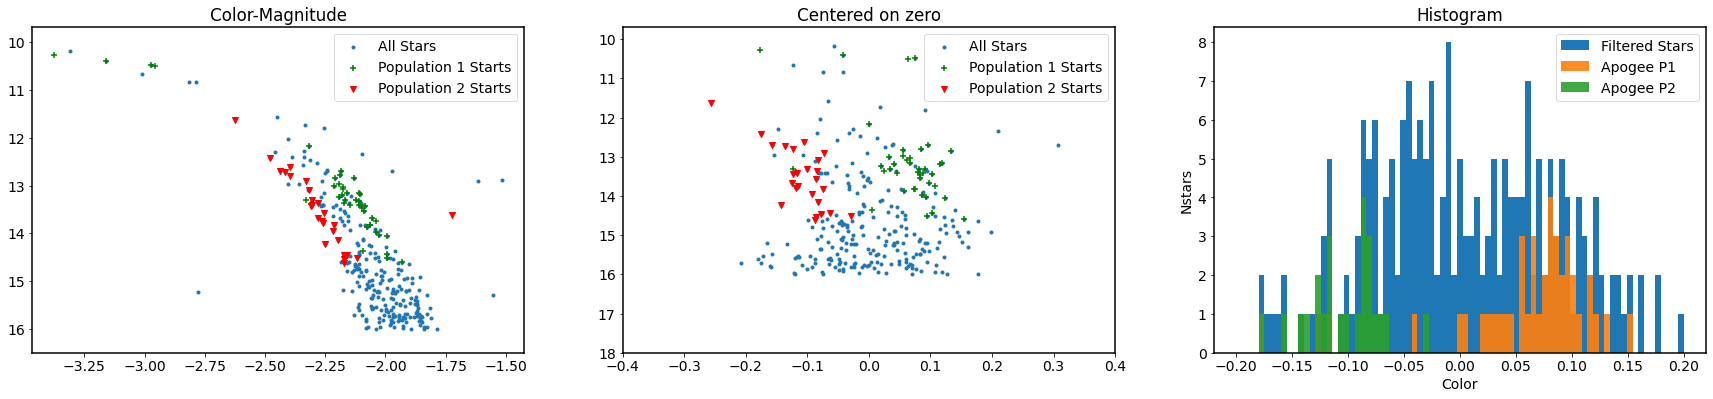

In [22]:
plt.figure(figsize=(30,6))


p1C = color[P1]
p2C = color[P2]
mg = clusterFrame.phot_g_mean_mag.values
p1m = mg[P1]
p2m = mg[P2]

ax = plt.subplot(131)

plt.scatter(clensedCol, cleansedMG, marker=".",label="All Stars")

plt.scatter(p1C,p1m,c='g',marker="+",label="Population 1 Starts")
plt.scatter(p2C,p2m,c='r',marker="v",label="Population 2 Starts")


plt.title(f"Color-Magnitude")
plt.legend()

#plt.xlim(-7.5, -6.5)
plt.ylim(max(nG)+0.5, min(nG)-0.5)


ax = plt.subplot(132)


p1C = color[P1]
p2C = color[P2]
mg = clusterFrame.phot_g_mean_mag.values
p1m = mg[P1]
p2m = mg[P2]

p1zC = color[P1] - f(p1m)
p2zC = color[P2] - f(p2m)


plt.scatter(NC, MG, marker=".",label="All Stars")

plt.scatter(p1zC,p1m,c='g',marker="+",label="Population 1 Starts")
plt.scatter(p2zC,p2m,c='r',marker="v",label="Population 2 Starts")

plt.title(f"Centered on zero")
plt.legend()
plt.ylim(18, min(nG)-0.5)
plt.xlim(-0.4,.4)



ax = plt.subplot(133)

r= 0.2
bs = np.linspace(-r,r,80)



plt.hist(N,bs,label="Filtered Stars")
plt.hist(p1zC,bs,label="Apogee P1",alpha=0.9)
plt.hist(p2zC,bs,label="Apogee P2",alpha=0.9)

plt.title(f"Histogram")

plt.legend()

plt.xlabel("Color")
plt.ylabel("Nstars")

#plt.suptitle(r"$Gaia_S$ Filter")

plt.show()



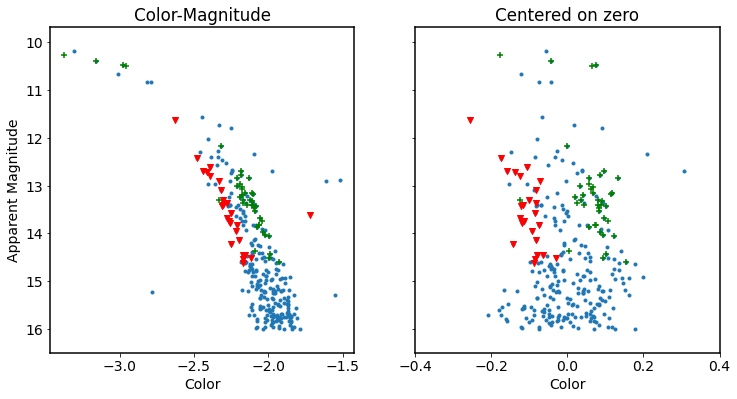

In [37]:
plt.figure(figsize=(12,6))


p1C = color[P1]
p2C = color[P2]
mg = clusterFrame.phot_g_mean_mag.values
p1m = mg[P1]
p2m = mg[P2]

ax = plt.subplot(121)

plt.scatter(clensedCol, cleansedMG, marker=".",label="All Stars")

plt.scatter(p1C,p1m,c='g',marker="+",label="Population 1 Starts")
plt.scatter(p2C,p2m,c='r',marker="v",label="Population 2 Starts")


plt.title(f"Color-Magnitude")
#plt.legend()

#plt.xlim(-7.5, -6.5)
plt.ylim(max(nG)+0.5, min(nG)-0.5)


plt.yticks(range(10,17))

plt.ylabel("Apparent Magnitude")
plt.xlabel("Color")
ax1 = plt.subplot(122)
plt.xlabel("Color")

p1C = color[P1]
p2C = color[P2]
mg = clusterFrame.phot_g_mean_mag.values
p1m = mg[P1]
p2m = mg[P2]

p1zC = color[P1] - f(p1m)
p2zC = color[P2] - f(p2m)


plt.scatter(NC, MG, marker=".",label="All Stars")

plt.scatter(p1zC,p1m,c='g',marker="+",label="Population 1 Starts")
plt.scatter(p2zC,p2m,c='r',marker="v",label="Population 2 Starts")

plt.title(f"Centered on zero")
#plt.legend()
plt.ylim(max(nG)+0.5, min(nG)-0.5)

plt.xlim(-0.4,.4)

plt.yticks(range(10,17),[])


plt.show()

